In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import mean_squared_error


## Simulated Regression task 

In [2]:
def simulate_data(n_samples):
    df = pd.DataFrame()
    df['x'] = np.random.uniform(size=n_samples)*3
    df['y'] = df['x']**3+3*np.random.normal(size=n_samples)
    return df

1. Compute the training and generalisation error of knn for this new training set. Repeat the experiment several times in order to get a mean and a variance. How dependent is the prediction on the training set?


In [3]:
repeats = 100
n_samples = 100
test_errors = [] # generalization errors
emp_errors = [] # training errors
k = 5

for r in range(repeats): # We do `repeats` experiments
    # Simulate and the training data
    df_train = simulate_data(n_samples)
    X = df_train["x"].values[:,np.newaxis] # column matrix instead of line vector
    y = df_train["y"]
    
    # Simulate the test data
    test = simulate_data(500)
    X_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
    y_test = test["y"]
    
    # Train the estimator
    knn = neighbors.KNeighborsRegressor(k)
    knn.fit(X, y)

    # Predict and compute the error
    yhat_train = knn.predict(X)
    emp_errors.append(np.sqrt(mean_squared_error(y, yhat_train)))
    yhat_test = knn.predict(X_test)
    test_errors.append(np.sqrt(mean_squared_error(y_test, yhat_test)))

train_sample_errors = pd.DataFrame({"train":emp_errors,"test":test_errors})
train_sample_errors.describe()

train        test
count  100.000000  100.000000
mean     2.691057    3.303118
std      0.234530    0.128732
min      2.260896    2.852726
25%      2.530372    3.214294
50%      2.688384    3.315129
75%      2.814898    3.381732
max      3.277305    3.573455

2. How dependent is the prediction on the size of the training set? Plot a figure in order to visualise it. You may want to use seaborn's `lineplot` function for instance, with an errorbar parameter set to `sd` which means to plot mean $\pm$ standard deviation.


100%|███████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:12<00:00,  1.56it/s]


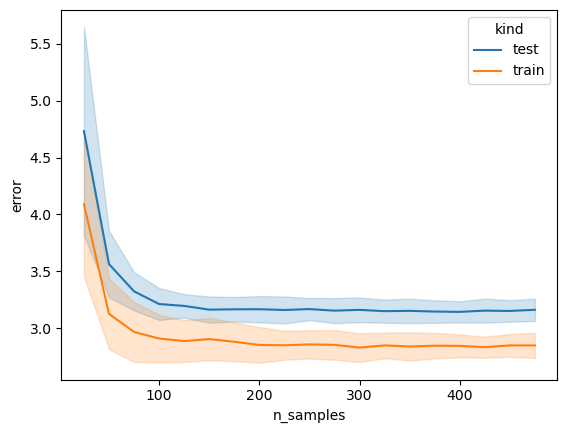

In [4]:
from tqdm import tqdm
repeats = 100
Ns = range(25, 500, 25)
k = 10
df_result = pd.DataFrame()

for n_samples in tqdm(Ns):
    for r in range(repeats):
        # Preprocess data
        df_train = simulate_data(n_samples)
        X = df_train["x"].values[:,np.newaxis] # column matrix instead of line vector
        y = df_train["y"]
        # Test
        test = simulate_data(500)
        X_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
        y_test = test["y"]
        # Train
        knn = neighbors.KNeighborsRegressor(k)
        knn.fit(X, y)
        # Predict
        yhat_train = knn.predict(X)
        emp_error = np.sqrt(mean_squared_error(y, yhat_train))
        yhat_test = knn.predict(X_test)
        test_error = np.sqrt(mean_squared_error(y_test, yhat_test))
        df_result = pd.concat([df_result,
                               pd.DataFrame({"n_samples":[n_samples],
                                            "error":[test_error],
                                             "kind":["test"]})],
                              ignore_index = True)
        df_result = pd.concat([df_result,
                               pd.DataFrame({"n_samples":[n_samples],
                                            "error":[emp_error],
                                             "kind":["train"]})],
                              ignore_index = True)
import seaborn as sns
sns.lineplot(data = df_result, x = "n_samples", 
                 y="error", hue = "kind", errorbar="sd")
plt.show()

3. How dependent is the prediction on the hyperparameter $k$? Plot a figure in order to visualise it and say which value of $k$ seems optimal.

100%|███████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:17<00:00,  1.39it/s]


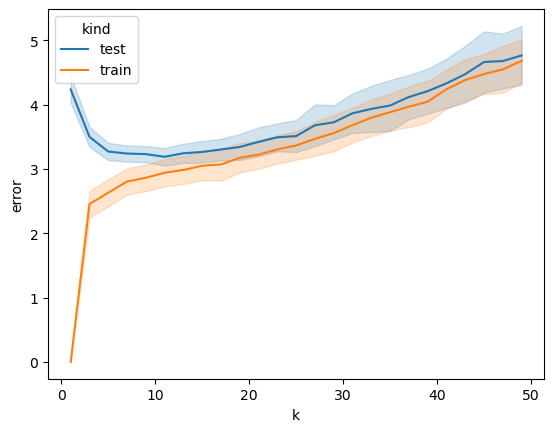

In [5]:

from tqdm import tqdm
repeats = 100
ks = np.arange(1,50,2)
n_samples = 100
df_result = pd.DataFrame()

for k in tqdm(ks):
    for r in range(repeats):
        # Preprocess data
        df_train = simulate_data(n_samples)
        X = df_train["x"].values[:,np.newaxis] # column matrix instead of line vector
        y = df_train["y"]
        # Test
        test = simulate_data(500)
        X_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
        y_test = test["y"]
        # Train
        knn = neighbors.KNeighborsRegressor(k)
        knn.fit(X, y)
        # Predict
        yhat_train = knn.predict(X)
        emp_error = np.sqrt(mean_squared_error(y, yhat_train))
        yhat_test = knn.predict(X_test)
        test_error = np.sqrt(mean_squared_error(y_test, yhat_test))
        df_result = pd.concat([df_result,
                               pd.DataFrame({"k":[k],
                                            "error":[test_error],
                                             "kind":["test"]})],
                              ignore_index = True)
        df_result = pd.concat([df_result,
                               pd.DataFrame({"k":[k],
                                            "error":[emp_error],
                                             "kind":["train"]})],
                              ignore_index = True)
import seaborn as sns
sns.lineplot(data = df_result, x = "k", y="error", hue="kind", errorbar="sd");
# It seems that k around 10 seems optimal

## Error estimation on a real dataset

In [3]:
df = pd.read_csv('breast_cancer.csv', index_col=0)

In [4]:
df.head()

target  feature 0  feature 1  feature 2  feature 3  feature 4  feature 5  \
0       1      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1       1      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2       1      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3       1      11.42      20.38      77.58      386.1    0.14250    0.28390   
4       1      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   feature 6  feature 7  feature 8  ...  feature 20  feature 21  feature 22  \
0     0.3001    0.14710     0.2419  ...       25.38       17.33      184.60   
1     0.0869    0.07017     0.1812  ...       24.99       23.41      158.80   
2     0.1974    0.12790     0.2069  ...       23.57       25.53      152.50   
3     0.2414    0.10520     0.2597  ...       14.91       26.50       98.87   
4     0.1980    0.10430     0.1809  ...       22.54       16.67      152.20   

   feature 23  feature 24  feature 25  feature 26  feature 27  feature 28  \
0      2019.0      0.1622      0.6656      0.7119      0.2654      0.4601   
1      1956.0      0.1238      0.1866      0.2416      0.1860      0.2750   
2      1709.0      0.1444      0.4245      0.4504      0.2430      0.3613   
3       567.7      0.2098      0.8663      0.6869      0.2575      0.6638   
4      1575.0      0.1374      0.2050      0.4000      0.1625      0.2364   

   feature 29  
0     0.11890  
1     0.08902  
2     0.08758  
3     0.17300  
4     0.07678  

[5 rows x 31 columns]

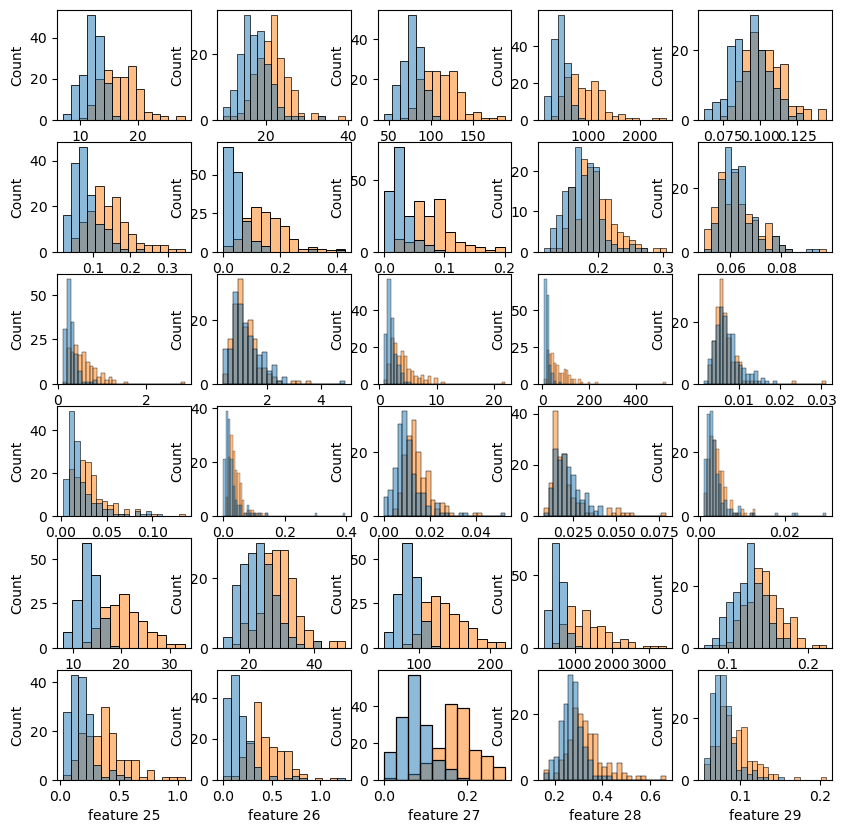

In [5]:
fig, axes = plt.subplots(6,5, figsize=(10,10))
axes = axes.ravel()
for i, ax in enumerate(axes):
    sns.histplot(ax=ax, data=df, x="feature "+str(i), hue="target", legend=None)